In [1]:
!date

Sun May 25 05:04:06 PM EDT 2025


In [2]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
import ants
from tqdm import tqdm

In [4]:
nreps = 20

In [19]:
analysis_dir = '../Data/StudyForrest/ensembles_last_CVAE/'
#analysis_name = 'fixed-seed-00-YuOrig-00-DataloaderFix'
analysis_name = 'DeepCor-ABCD-v5'

In [20]:
fn_temp = os.path.join(analysis_dir,analysis_name,'signal_S{s}_R{r}_rep_{rep}.nii.gz')

In [7]:
# for s in np.arange(34):
#     for r in [1,2]:
#         ofn_avg = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_avg.nii.gz')
#         os.remove(ofn_avg) if os.path.exists(ofn_avg) else None
#         ofn_med = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_med.nii.gz')
#         os.remove(ofn_med) if os.path.exists(ofn_med) else None

In [10]:
svec = np.arange(34)
rvec = [1,2]

<AxesSubplot:>

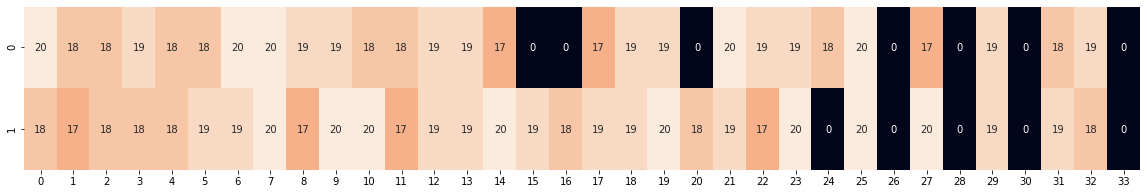

In [31]:
check_done = np.zeros((len(svec),len(rvec)))
for s in svec:
    for r in rvec:
        check_done[s,r-1] = sum([os.path.exists(fn_temp.format(s=s,r=r,rep=rep))  for rep in range(20)])

import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,3))
sns.heatmap(check_done.transpose(),annot=True,cbar=False)

<AxesSubplot:>

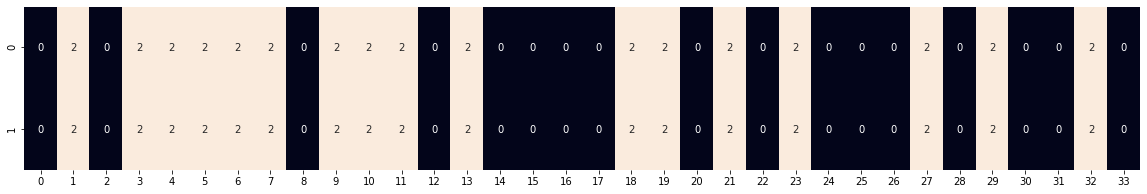

In [14]:
check_done = np.zeros((len(svec),len(rvec)))
for s in svec:
    for r in rvec:
        is_done = [os.path.exists(os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_avg.nii.gz')),
                  os.path.exists(os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_med.nii.gz'))]
        check_done[s,r-1]=np.array(is_done).sum()

import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,3))
sns.heatmap(check_done.transpose(),annot=True,cbar=False)

In [11]:
for s in tqdm( np.random.permutation(np.arange(34)) ):
    for r in tqdm( np.random.permutation([1,2]), leave = False ):
        ofn_avg = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_avg.nii.gz')
        ofn_med = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_med.nii.gz')
        if not all((os.path.exists(ofn_avg),os.path.exists(ofn_med))):
            ims = [ants.image_read(fn_temp.format(s=s,r=r,rep=rep)) for rep in np.arange(20) if os.path.exists(fn_temp.format(s=s,r=r,rep=rep))]
            arrs = np.array([im.numpy() for im in ims])
            good_sub_vec = (np.isnan(arrs)*1.0).sum(axis=(1, 2, 3, 4))==0
            good_sub_vec*=arrs.max(axis=(1, 2, 3, 4))<1e3
            good_sub_vec*=arrs.max(axis=(1, 2, 3, 4))>1e-3
            arrs = arrs[good_sub_vec]
            if len(ims)>10:
                arr_avg = np.average(arrs,axis=0)
                arr_med = np.median(arrs,axis=0)
                im_avg = ims[0].new_image_like(arr_avg)
                im_avg.to_filename(ofn_avg)
                im_med = ims[0].new_image_like(arr_med)
                im_med.to_filename(ofn_med)

In [ ]:
# # RANDOM
# for s in tqdm( np.random.permutation(np.arange(14)) ):
#     for r in tqdm( np.random.permutation([1,2,3,4]), leave = False ):
#         print(f'{s}/{r}')
#         ofn_avg = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_avg.nii.gz')
#         ofn_med = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_med.nii.gz')
#         #if not all((os.path.exists(ofn_avg),os.path.exists(ofn_med))):
            
#         ims = [ants.image_read(fn_temp.format(s=s,r=r,rep=rep)) for rep in np.arange(20) if os.path.exists(fn_temp.format(s=s,r=r,rep=rep))]            
#         arrs = np.array([im.numpy() for im in ims])
#         good_sub_vec = (np.isnan(arrs)*1.0).sum(axis=(1, 2, 3, 4))==0
#         good_sub_vec*=arrs.max(axis=(1, 2, 3, 4))<1e3
#         good_sub_vec*=arrs.max(axis=(1, 2, 3, 4))>1e-3
#         arrs = arrs[good_sub_vec]

#         arr_avg = np.average(arrs,axis=0)
#         arr_med = np.median(arrs,axis=0)
#         im_avg = ims[0].new_image_like(arr_avg)
#         im_avg.to_filename(ofn_avg)
#         im_med = ims[0].new_image_like(arr_med)
#         im_med.to_filename(ofn_med)

In [ ]:
for s in tqdm( np.random.permutation(np.arange(34)) ):
    for r in tqdm( np.random.permutation([1,2]), leave = False ):
        ofn_avg = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_avg.nii.gz')
        ofn_med = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_med.nii.gz')
        if not all((os.path.exists(ofn_avg),os.path.exists(ofn_med))):
            ims = [ants.image_read(fn_temp.format(s=s,r=r,rep=rep)) for rep in np.arange(20) if os.path.exists(fn_temp.format(s=s,r=r,rep=rep))]
            if len(ims)>10:
                arr_avg = np.average(np.array([im.numpy() for im in ims]),axis=0)
                arr_med = np.median(np.array([im.numpy() for im in ims]),axis=0)
                im_avg = ims[0].new_image_like(arr_avg)
                im_avg.to_filename(ofn_avg)
                im_med = ims[0].new_image_like(arr_med)
                im_med.to_filename(ofn_med)

 50%|█████     | 1/2 [12:35<12:35, 755.10s/it]

In [ ]:
# # RANDOM
# for s in tqdm( np.random.permutation(np.arange(14)) ):
#     for r in tqdm( np.random.permutation([1,2,3,4]), leave = False ):
#         print(f'{s}/{r}')
#         ofn_avg = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_avg.nii.gz')
#         ofn_med = os.path.join(analysis_dir,analysis_name,f'signal_S{s}_R{r}_med.nii.gz')
#         #if not all((os.path.exists(ofn_avg),os.path.exists(ofn_med))):
            
#         ims = [ants.image_read(fn_temp.format(s=s,r=r,rep=rep)) for rep in np.arange(20) if os.path.exists(fn_temp.format(s=s,r=r,rep=rep))]            
#         arrs = np.array([im.numpy() for im in ims])
#         good_sub_vec = (np.isnan(arrs)*1.0).sum(axis=(1, 2, 3, 4))==0
#         good_sub_vec*=arrs.max(axis=(1, 2, 3, 4))<1e3
#         good_sub_vec*=arrs.max(axis=(1, 2, 3, 4))>1e-3
#         arrs = arrs[good_sub_vec]

#         arr_avg = np.average(arrs,axis=0)
#         arr_med = np.median(arrs,axis=0)
#         im_avg = ims[0].new_image_like(arr_avg)
#         im_avg.to_filename(ofn_avg)
#         im_med = ims[0].new_image_like(arr_med)
#         im_med.to_filename(ofn_med)